In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [6]:
data = pd.read_csv('data.csv')

data.head()

    # Encode 'Residence_type' as a binary feature 'Urban/Rural'
data['Urban/Rural'] = data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
    # Converting 'Residence_type' to binary (Urban=1, Rural=0) helps standardize data and makes it suitable for machine learning algorithms.

    # One-Hot Encode the 'work_type' variable
data['work_type_Never_worked'] = data['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
data['work_type_Private'] = data['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
data['work_type_Self_employed'] = data['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)
    # This process transforms categorical data into a series of binary columns.
    # Each row will have a 1 in the column representing its category and 0 elsewhere.
    # This is beneficial as it makes the data numeric and suitable for machine learning algorithms.

    # One-Hot Encode the 'smoking_status' variable
data['smoking_status_formerly_smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
data['smoking_status_never_smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
data['smoking_status_smokes'] = data['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)
    # Similar to 'work_type', converting 'smoking_status' to a set of binary columns to prepare data for model training.
    # This step standardizes the categorical information, which helps improve model performance.

    # Create a copy of the data for model training and transformation
model_data = data.copy()
    # Keeping a copy of the transformed data allows flexibility to use it for training without altering the original dataset.

    # Drop the original categorical columns that were one-hot encoded
model_data.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1, inplace=True)
    # Removing the original columns reduces redundancy in the data, preventing multicollinearity issues.
    # The resulting dataset is now entirely numeric, making it ready for most machine learning models.

    # Print the final transformed dataset for verification
print(model_data)
    # Displaying the transformed dataset provides a quick check to ensure the data is in the expected format for further analysis or model building.


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

      avg_glucose_level   bmi  stroke  Urban/Rural  work_type_Never_worked  \
0                228.69  36.6       1            1                   

<ipython-input-11-d2461fd9715d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True, color="darkcyan", linewidth=2)


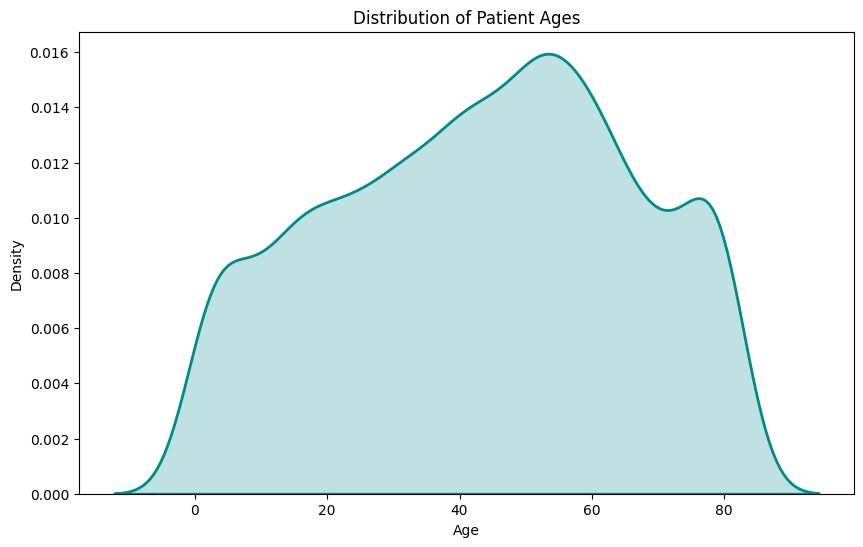

<ipython-input-11-d2461fd9715d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='avg_glucose_level', data=data, palette="mako")


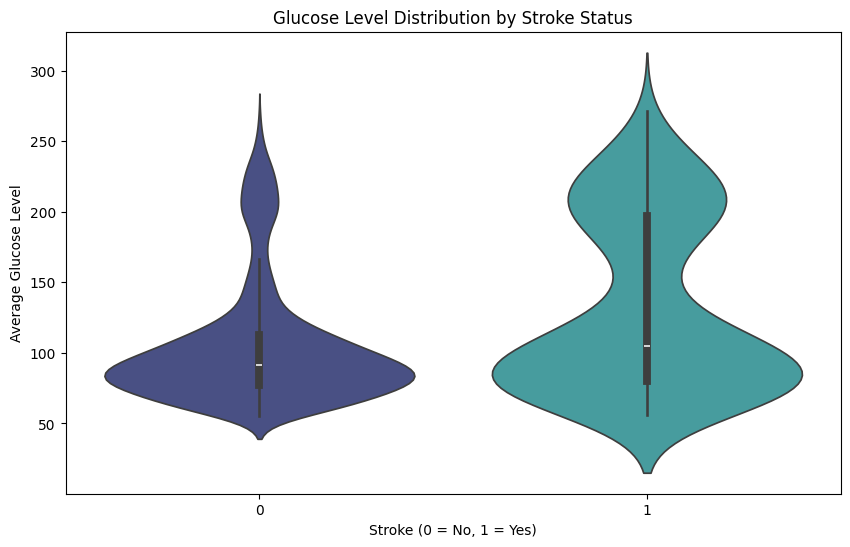

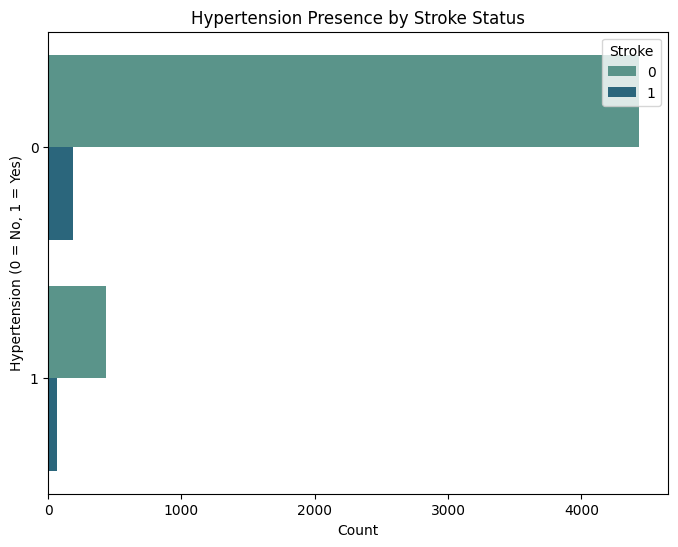

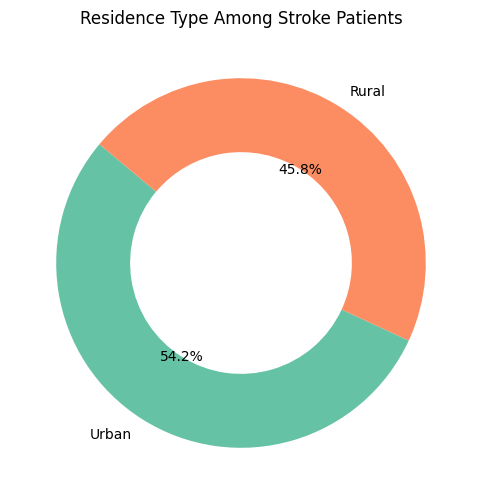

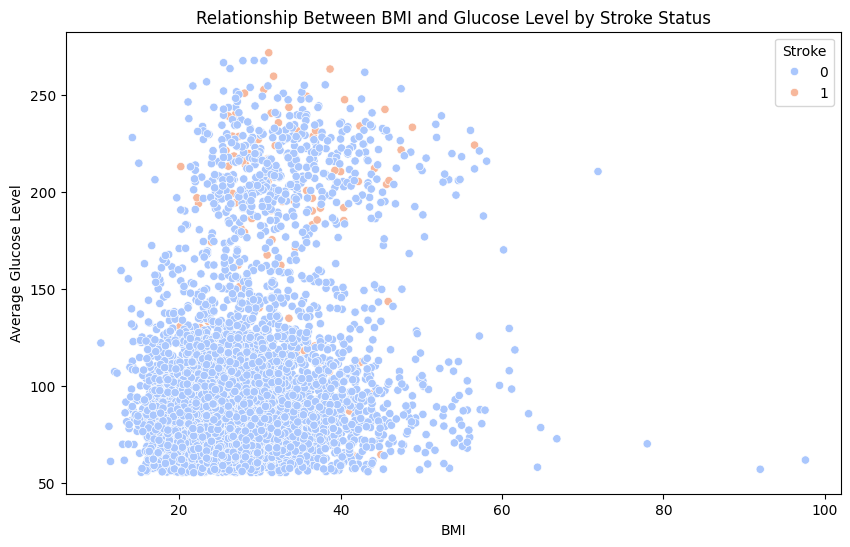

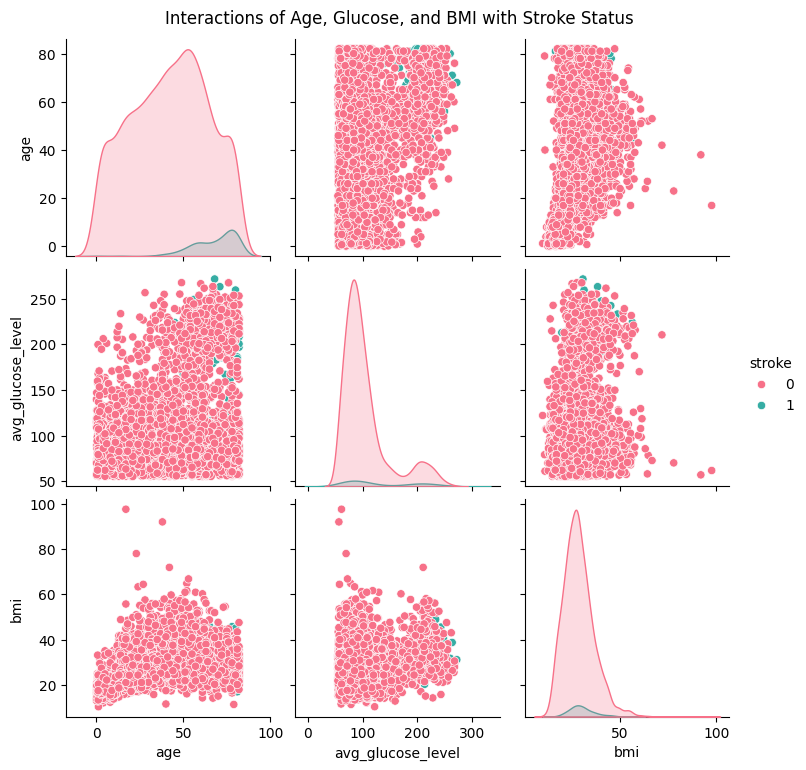

In [11]:


# Load the dataset
data = pd.read_csv('data.csv')
data.head()

# 1. Age Distribution Analysis
# KDE Plot for Age Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data['age'], shade=True, color="darkcyan", linewidth=2)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Density")
plt.savefig('age_distribution_kde.png')
plt.show()

# Observation:
# The age distribution appears bimodal, with concentrations around middle age (40–60 years)
# and older groups (near 80). This suggests a notable representation of both mid-aged and
# senior patients in the dataset.

# 2. Glucose Levels by Stroke Status
# Violin Plot for Glucose Levels by Stroke
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='avg_glucose_level', data=data, palette="mako")
plt.title("Glucose Level Distribution by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.savefig('glucose_by_stroke_violin.png')
plt.show()

# Observation:
# Patients with a stroke show a higher average glucose level, with a broader spread. This
# variability indicates elevated glucose might be a risk factor for stroke.

# 3. Hypertension and Stroke Connection
# Horizontal Bar Chart for Hypertension vs. Stroke Status
plt.figure(figsize=(8, 6))
sns.countplot(y='hypertension', hue='stroke', data=data, palette="crest")
plt.title("Hypertension Presence by Stroke Status")
plt.xlabel("Count")
plt.ylabel("Hypertension (0 = No, 1 = Yes)")
plt.legend(title="Stroke", loc="upper right")
plt.savefig('hypertension_vs_stroke_bar.png')
plt.show()

# Observation:
# The majority of hypertensive patients have not suffered a stroke, suggesting that although
# hypertension may be a risk factor, it alone does not correlate strongly with stroke.

# 4. Residence Type Distribution Among Stroke Patients
# Donut Chart for Residence Type among Stroke Patients
stroke_residence = data[data['stroke'] == 1]['Residence_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stroke_residence, labels=stroke_residence.index, autopct='%1.1f%%', startangle=140,
        colors=['#66c2a5', '#fc8d62'], wedgeprops=dict(width=0.4))
plt.title("Residence Type Among Stroke Patients")
plt.ylabel("")
plt.savefig('residence_type_donut.png')
plt.show()

# Observation:
# Urban residents make up a slightly larger percentage of stroke cases (about 54%) than rural
# residents, which may reflect broader urban health trends.

# 5. BMI and Glucose Relationship by Stroke Status
# Scatter Plot for BMI and Glucose Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=data, palette="coolwarm")
plt.title("Relationship Between BMI and Glucose Level by Stroke Status")
plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke")
plt.savefig('bmi_vs_glucose_scatter.png')
plt.show()

# Observation:
# Higher glucose levels are observed among both stroke and non-stroke groups, especially in
# patients with BMIs ranging from 20–60. Stroke occurrences are more frequent in patients with
# elevated glucose, hinting at a potential link.

# 6. Age, Glucose Level, and BMI Interaction with Stroke
# Pairplot for Age, Glucose Level, and BMI by Stroke Status
sns.pairplot(data, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette="husl")
plt.suptitle("Interactions of Age, Glucose, and BMI with Stroke Status", y=1.02)
plt.savefig('pairplot_age_glucose_bmi_interaction.png')
plt.show()

# Observation:
# Stroke cases (noted in a distinct color) are more concentrated in higher glucose levels and
# across varied ages over 40. BMI does not exhibit a clear pattern, implying age and glucose
# may play stronger roles in stroke risk.
